In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.ion()
import sys
sys.path.append('../')

In [2]:
from propagator.constants import  *

Text(0, 0.5, 'RoS [m/min]')

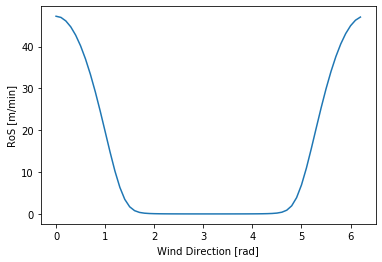

In [62]:
w_speed = 20 #in m/s
angle_to = 0
dh = 0
cellsize= 20
dist = 1
v = 1 # in m/min

W_DIR = np.arange(0, np.pi*2, 0.1)
V_WH = []
for w_dir in W_DIR:
    w_proj = np.cos(w_dir - angle_to) #wind component in propagation direction
    w_spd = (w_speed * w_proj) / 3.6 #wind speed in the direction of propagation

    teta_s_rad = np.arctan(dh / cellsize * dist) #slope angle [rad]
    teta_s = np.degrees(teta_s_rad) #slope angle [°]

    teta_f_rad = np.arctan(0.4226 * w_spd) #flame angle measured from the vertical in the direction of fire spread [rad]
    teta_f = np.degrees(teta_f_rad) #flame angle [°]
    v_wh_pre = v * np.exp(alpha1 * teta_s + alpha2 * teta_f) #Rate of Spread evaluate with Rothermel's model
    v_wh = np.clip(v_wh_pre, 0.01, 100) #adoptable RoS
    
    V_WH.append(v_wh)

plt.plot(W_DIR, V_WH)
plt.xlabel('Wind Direction [rad]')
plt.ylabel('RoS [m/min]')

Contributo del vento
---------------------

C:\Users\utente\Miniconda3\envs\propagator_venv\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


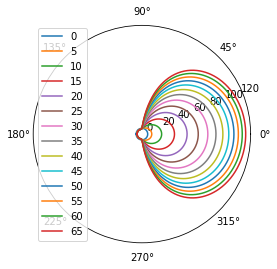

In [52]:
b = np.arange(-pi, pi, 0.01)
W_SPEED = np.arange(0, 70, 5)

W_EFFECT = []
for w_speed in W_SPEED:
    w_proj = np.cos(b - angle_to) #wind component in propagation direction
    w_spd = (w_speed * w_proj) / 3.6 #wind speed in the direction of propagation

    teta_f_rad = np.arctan(0.4226 * w_spd) #flame angle measured from the vertical in the direction of fire spread [rad]
    teta_f = np.degrees(teta_f_rad) #flame angle [°]
    
    w_effect = np.exp(alpha2 * teta_f) #wind effect evaluates with Rothermel's model
    
    W_EFFECT.append(w_effect)
    ax = plt.subplot(111, projection='polar')
    ax.plot(b, w_effect) 
   
plt.grid()
plt.legend(W_SPEED, loc='center left')



Text(0, 0.5, 'Wind Factor [-]')

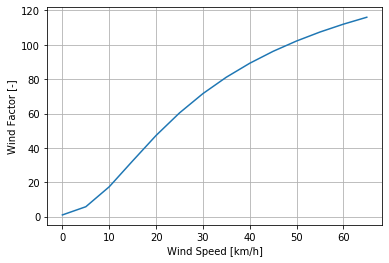

In [71]:
b=0
W_SPEED = np.arange(0, 70, 5)

W_EFFECT = []
for w_speed in W_SPEED:
    w_proj = np.cos(b - angle_to) #wind component in propagation direction
    w_spd = (w_speed * w_proj) / 3.6 #wind speed in the direction of propagation

    teta_f_rad = np.arctan(0.4226 * w_spd) #flame angle measured from the vertical in the direction of fire spread [rad]
    teta_f = np.degrees(teta_f_rad) #flame angle [°]
    
    w_effect = np.exp(alpha2 * teta_f) #wind effect evaluates with Rothermel's model
    
    W_EFFECT.append(w_effect)
W_Speed = W_SPEED.transpose()
plt.plot(W_Speed, W_EFFECT) 
   
plt.grid()
plt.xlabel('Wind Speed [km/h]')
plt.ylabel('Wind Factor [-]')

Contributo dello slope
------------------

Text(0, 0.5, 'slope-effect [-]')

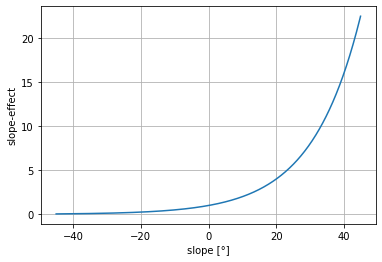

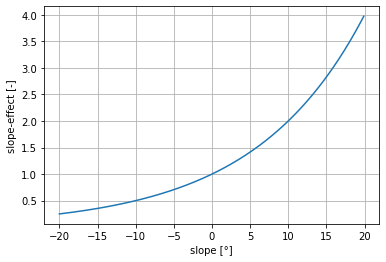

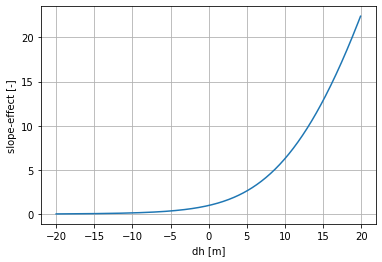

In [32]:
teta_s = np.arange(-45,45,0.1) #slope angle [°]

s_effect = np.exp(alpha1 * teta_s) #slope effect evaluates with Rothermel's model

plt.plot(teta_s, s_effect)
plt.grid()
plt.xlabel('slope [°]')
plt.ylabel('slope-effect')

#più nel dettaglio....
teta_s2 = np.arange(-20,20,0.1) #slope angle [°]

s_effect2 = np.exp(alpha1 * teta_s2) #slope effect evaluates with Rothermel's model

plt.figure()
plt.plot(teta_s2, s_effect2)
plt.grid()
plt.xlabel('slope [°]')
plt.ylabel('slope-effect [-]')

#se guardo come varia in funzione di dh
dh = np.arange(-20,20,0.1)

teta_s_rad = np.arctan(dh / cellsize * dist) #slope angle [rad]
teta_s3 = np.degrees(teta_s_rad) #slope angle [°]

s_effect3 = np.exp(alpha1 * teta_s3) #slope effect evaluates with Rothermel's model

plt.figure()
plt.plot(dh, s_effect3)
plt.grid()
plt.xlabel('dh [m]')
plt.ylabel('slope-effect [-]')

Prove con limitazione alla velocità
--------------------------

C:\Users\utente\Miniconda3\envs\propagator_venv\lib\site-packages\ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


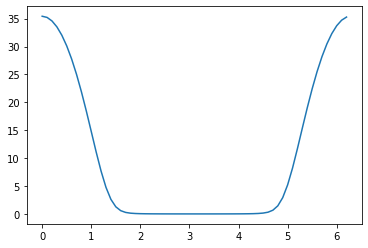

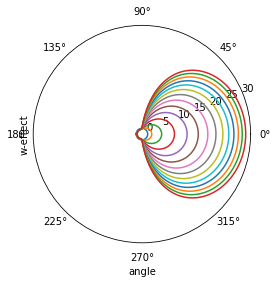

In [6]:
w_speed = 20 #in m/s
angle_to = 0
dh = 0
cellsize= 20
dist = 1
v = 3 # in m/min

limitatore = 0.25

W_DIR2 = np.arange(0, np.pi*2, 0.1)
V_WH2 = []
for w_dir in W_DIR2:
    w_proj2 = np.cos(w_dir - angle_to) #wind component in propagation direction
    w_spd2 = (w_speed * w_proj2) / 3.6 #wind speed in the direction of propagation

    teta_s_rad2 = np.arctan(dh / cellsize * dist) #slope angle [rad]
    teta_s2 = np.degrees(teta_s_rad2) #slope angle [°]

    teta_f_rad2 = np.arctan(0.4226 * w_spd2) #flame angle measured from the vertical in the direction of fire spread [rad]
    teta_f2 = np.degrees(teta_f_rad2) #flame angle [°]
    v_wh_pre2 = limitatore * v * np.exp(alpha1 * teta_s2 + alpha2 * teta_f2) #Rate of Spread evaluate with Rothermel's model
    v_wh2 = np.clip(v_wh_pre2, 0.01, 100) #adoptable RoS
    
    V_WH2.append(v_wh2)

plt.plot(W_DIR2, V_WH2)


######EFFETTO DEL VENTO#########
plt.figure()
b = np.arange(-pi, pi, 0.01)
W_SPEED = np.arange(0, 70, 5)

W_EFFECT = []
for w_speed in W_SPEED:
    w_proj = np.cos(b - angle_to) #wind component in propagation direction
    w_spd = (w_speed * w_proj) / 3.6 #wind speed in the direction of propagation

    teta_f_rad = np.arctan(0.4226 * w_spd) #flame angle measured from the vertical in the direction of fire spread [rad]
    teta_f = np.degrees(teta_f_rad) #flame angle [°]
    
    w_effect = limitatore * np.exp(alpha2 * teta_f) #wind effect evaluates with Rothermel's model
    
    W_EFFECT.append(w_effect)
    ax = plt.subplot(111, projection='polar')
    ax.plot(b, w_effect) 
    
plt.xlabel('angle')
plt.ylabel('w-effect')
plt.grid()

In [36]:
help(plt.legend)

Help on function legend in module matplotlib.pyplot:

legend(*args, **kwargs)
    Place a legend on the axes.
    
    Call signatures::
    
        legend()
        legend(labels)
        legend(handles, labels)
    
    The call signatures correspond to three different ways how to use
    this method.
    
    **1. Automatic detection of elements to be shown in the legend**
    
    The elements to be added to the legend are automatically determined,
    when you do not pass in any extra arguments.
    
    In this case, the labels are taken from the artist. You can specify
    them either at artist creation or by calling the
    :meth:`~.Artist.set_label` method on the artist::
    
        line, = ax.plot([1, 2, 3], label='Inline label')
        ax.legend()
    
    or::
    
        line, = ax.plot([1, 2, 3])
        line.set_label('Label via method')
        ax.legend()
    
    Specific lines can be excluded from the automatic legend element
    selection by defining a label st